## Utilizing Logisitc Regression to detect Credit Card Fraud!

### (and maybe decision trees?)

In [2]:
import pandas as pd

df = pd.read_csv('card_transdata.csv')

display(df.head())
df.tail()


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


#### There are 7 features and 1 target. There are no null values in the dataset and only data type is float

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print(f"Number of fraud cases: {(df['fraud'] == 1).sum()}")

Number of fraud cases: 87403


## Visualizing the features

### Numeric features

0.90     60.340778
0.95    100.016039
0.99    260.971167
Name: distance_from_home, dtype: float64

Text(0.5, 1.02, 'Comprehensive Visualizations for distance_from_home')

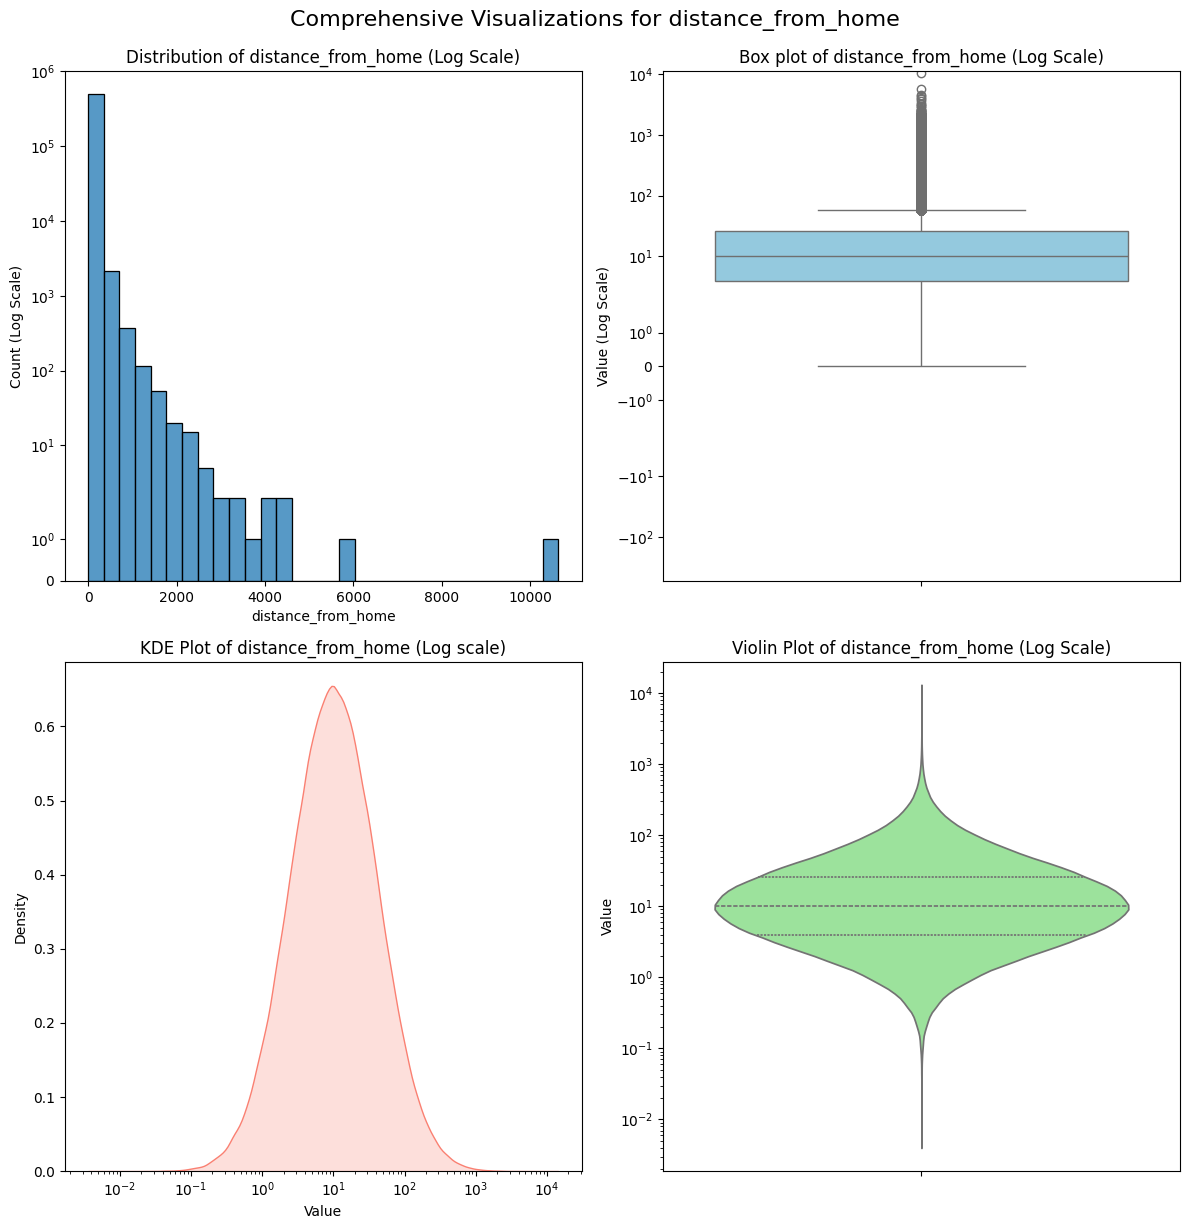

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the figure and axis, going to plot Histogram, Box Plot, KDE Plot, and Violin Plot
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 12))

axes = axes.flatten() #Makes it easier to iterate

feature_data = df.iloc[:(len(df)//2), 0] # Only grabbed first half since it takes awhile to visualize all examples

display(feature_data.quantile([0.9, 0.95, 0.99])) # When I initially created the hist I didn't realize the feature is highly right-skewed,
#Going to display the 90th, 95th, and 99th percentile to get a better x-axis upper bound


# Histplot
sns.histplot(feature_data, ax=axes[0], bins=30, log_scale=False, edgecolor='black')

axes[0].set_title(f"Distribution of {feature_data.name} (Log Scale)")
axes[0].set_xlabel(f"{feature_data.name}")
axes[0].set_ylabel('Count (Log Scale)')

axes[0].set_yscale('symlog')
axes[0].set_ylim(top=10e5)

# Box plot
sns.boxplot(y=feature_data, ax=axes[1], log_scale=False, color='skyblue')

axes[1].set_title(f"Box plot of {feature_data.name} (Log Scale)")
axes[1].set_ylabel('Value (Log Scale)')

axes[1].set_yscale('symlog')

#KDE Plot
sns.kdeplot(x=feature_data, fill=True, ax=axes[2], log_scale=True, color='salmon')
axes[2].set_title(f"KDE Plot of {feature_data.name} (Log scale)")
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')

# Plot 4: Violin Plot
sns.violinplot(y=feature_data, ax=axes[3], inner='quartile', log_scale=True, color='lightgreen')
axes[3].set_title(f"Violin Plot of {feature_data.name} (Log Scale)")
axes[3].set_ylabel('Value')

plt.tight_layout()
plt.suptitle(f"Comprehensive Visualizations for {feature_data.name}", y=1.02, fontsize=16)

### I ran the block above for each numeric feature, here's what I took away

#### All are very heavily skewed-right and many needed to be log transformed as some values range a lot and some values have significantly greater counts

### Binary features

Text(0.5, 1.02, 'Comprehensive Visualizations for repeat_retailer')

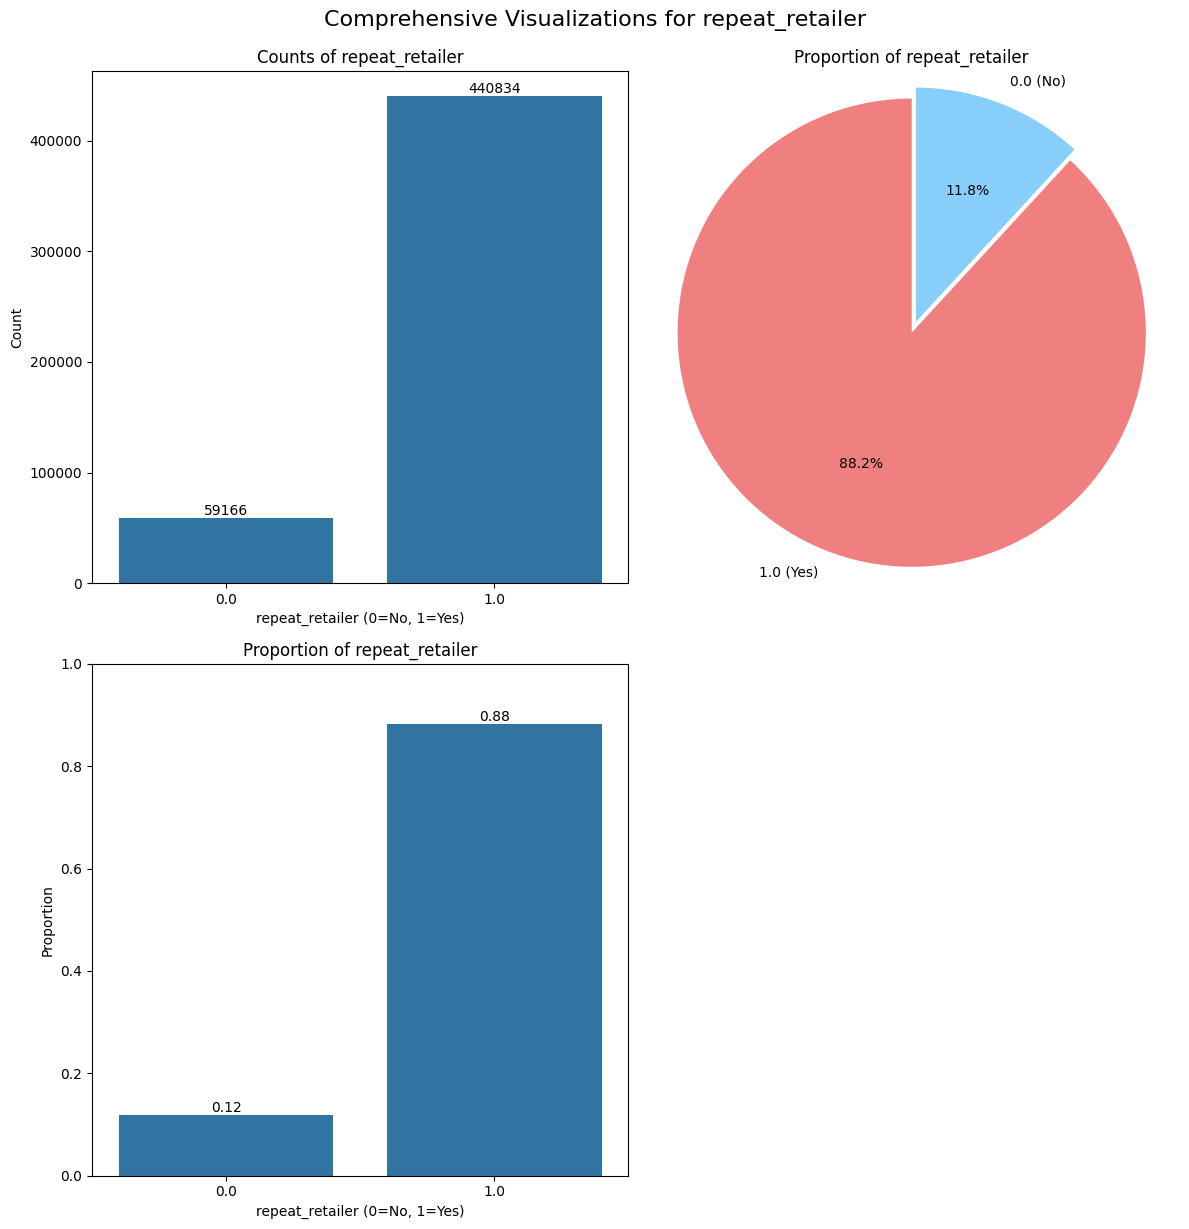

In [126]:
# Create the figure and axis, going to plot Count Plot (Bar Chart), Pie chart, and Bar Chart of proportions
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 12))
axes = axes.flatten()

feature_data = df.iloc[:(len(df)//2), 3] # Only grabbed first half since it takes awhile to visualize all examples

feature_name = feature_data.name

# Bar chart
sns.countplot(x=feature_data, ax=axes[0])
axes[0].set_title(f'Counts of {feature_name}')
axes[0].set_xlabel(f'{feature_name} (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Pie chart
counts = feature_data.value_counts()
labels = [f'{k} ({"Yes" if k==1 else "No"})' for k in counts.index] # More descriptive labels

axes[1].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'], explode=[0.05, 0])
axes[1].set_title(f'Proportion of {feature_name}')
axes[1].axis('equal') # Ensures pie chart is circular

# Bar chart of proportions
proportions = feature_data.value_counts(normalize=True)

sns.barplot(x=proportions.index, y = proportions.values, ax=axes[2])
axes[2].set_title(f'Proportion of {feature_name}')
axes[2].set_xlabel(f'{feature_name} (0=No, 1=Yes)')
axes[2].set_ylabel('Proportion')
axes[2].set_ylim(0,1)

for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points')


fig.delaxes(axes[3])

plt.tight_layout()
plt.suptitle(f"Comprehensive Visualizations for {feature_data.name}", y=1.02, fontsize=16)